In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For any inline visualizations or graphs in the project here we use the below code
%matplotlib inline

# Lets the load the Boston House Pricing Dataset

### Domain: Real Estate

#### Challenges: Missing value treatment, Outlier treatment, and Understanding which variables drive the price of homes in Boston

In [3]:
housing = pd.read_csv(r'C:\Users\nvenk\Downloads\HousingData.csv')

In [4]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### EDA

In [5]:
housing.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
housing = housing.rename(columns = {'MEDV' : 'Price'})

In [7]:
housing.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   24.0  
1       17.8  396

In [8]:
housing.describe()
# showing only continuous features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df = housing.dropna()

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
# coorelation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


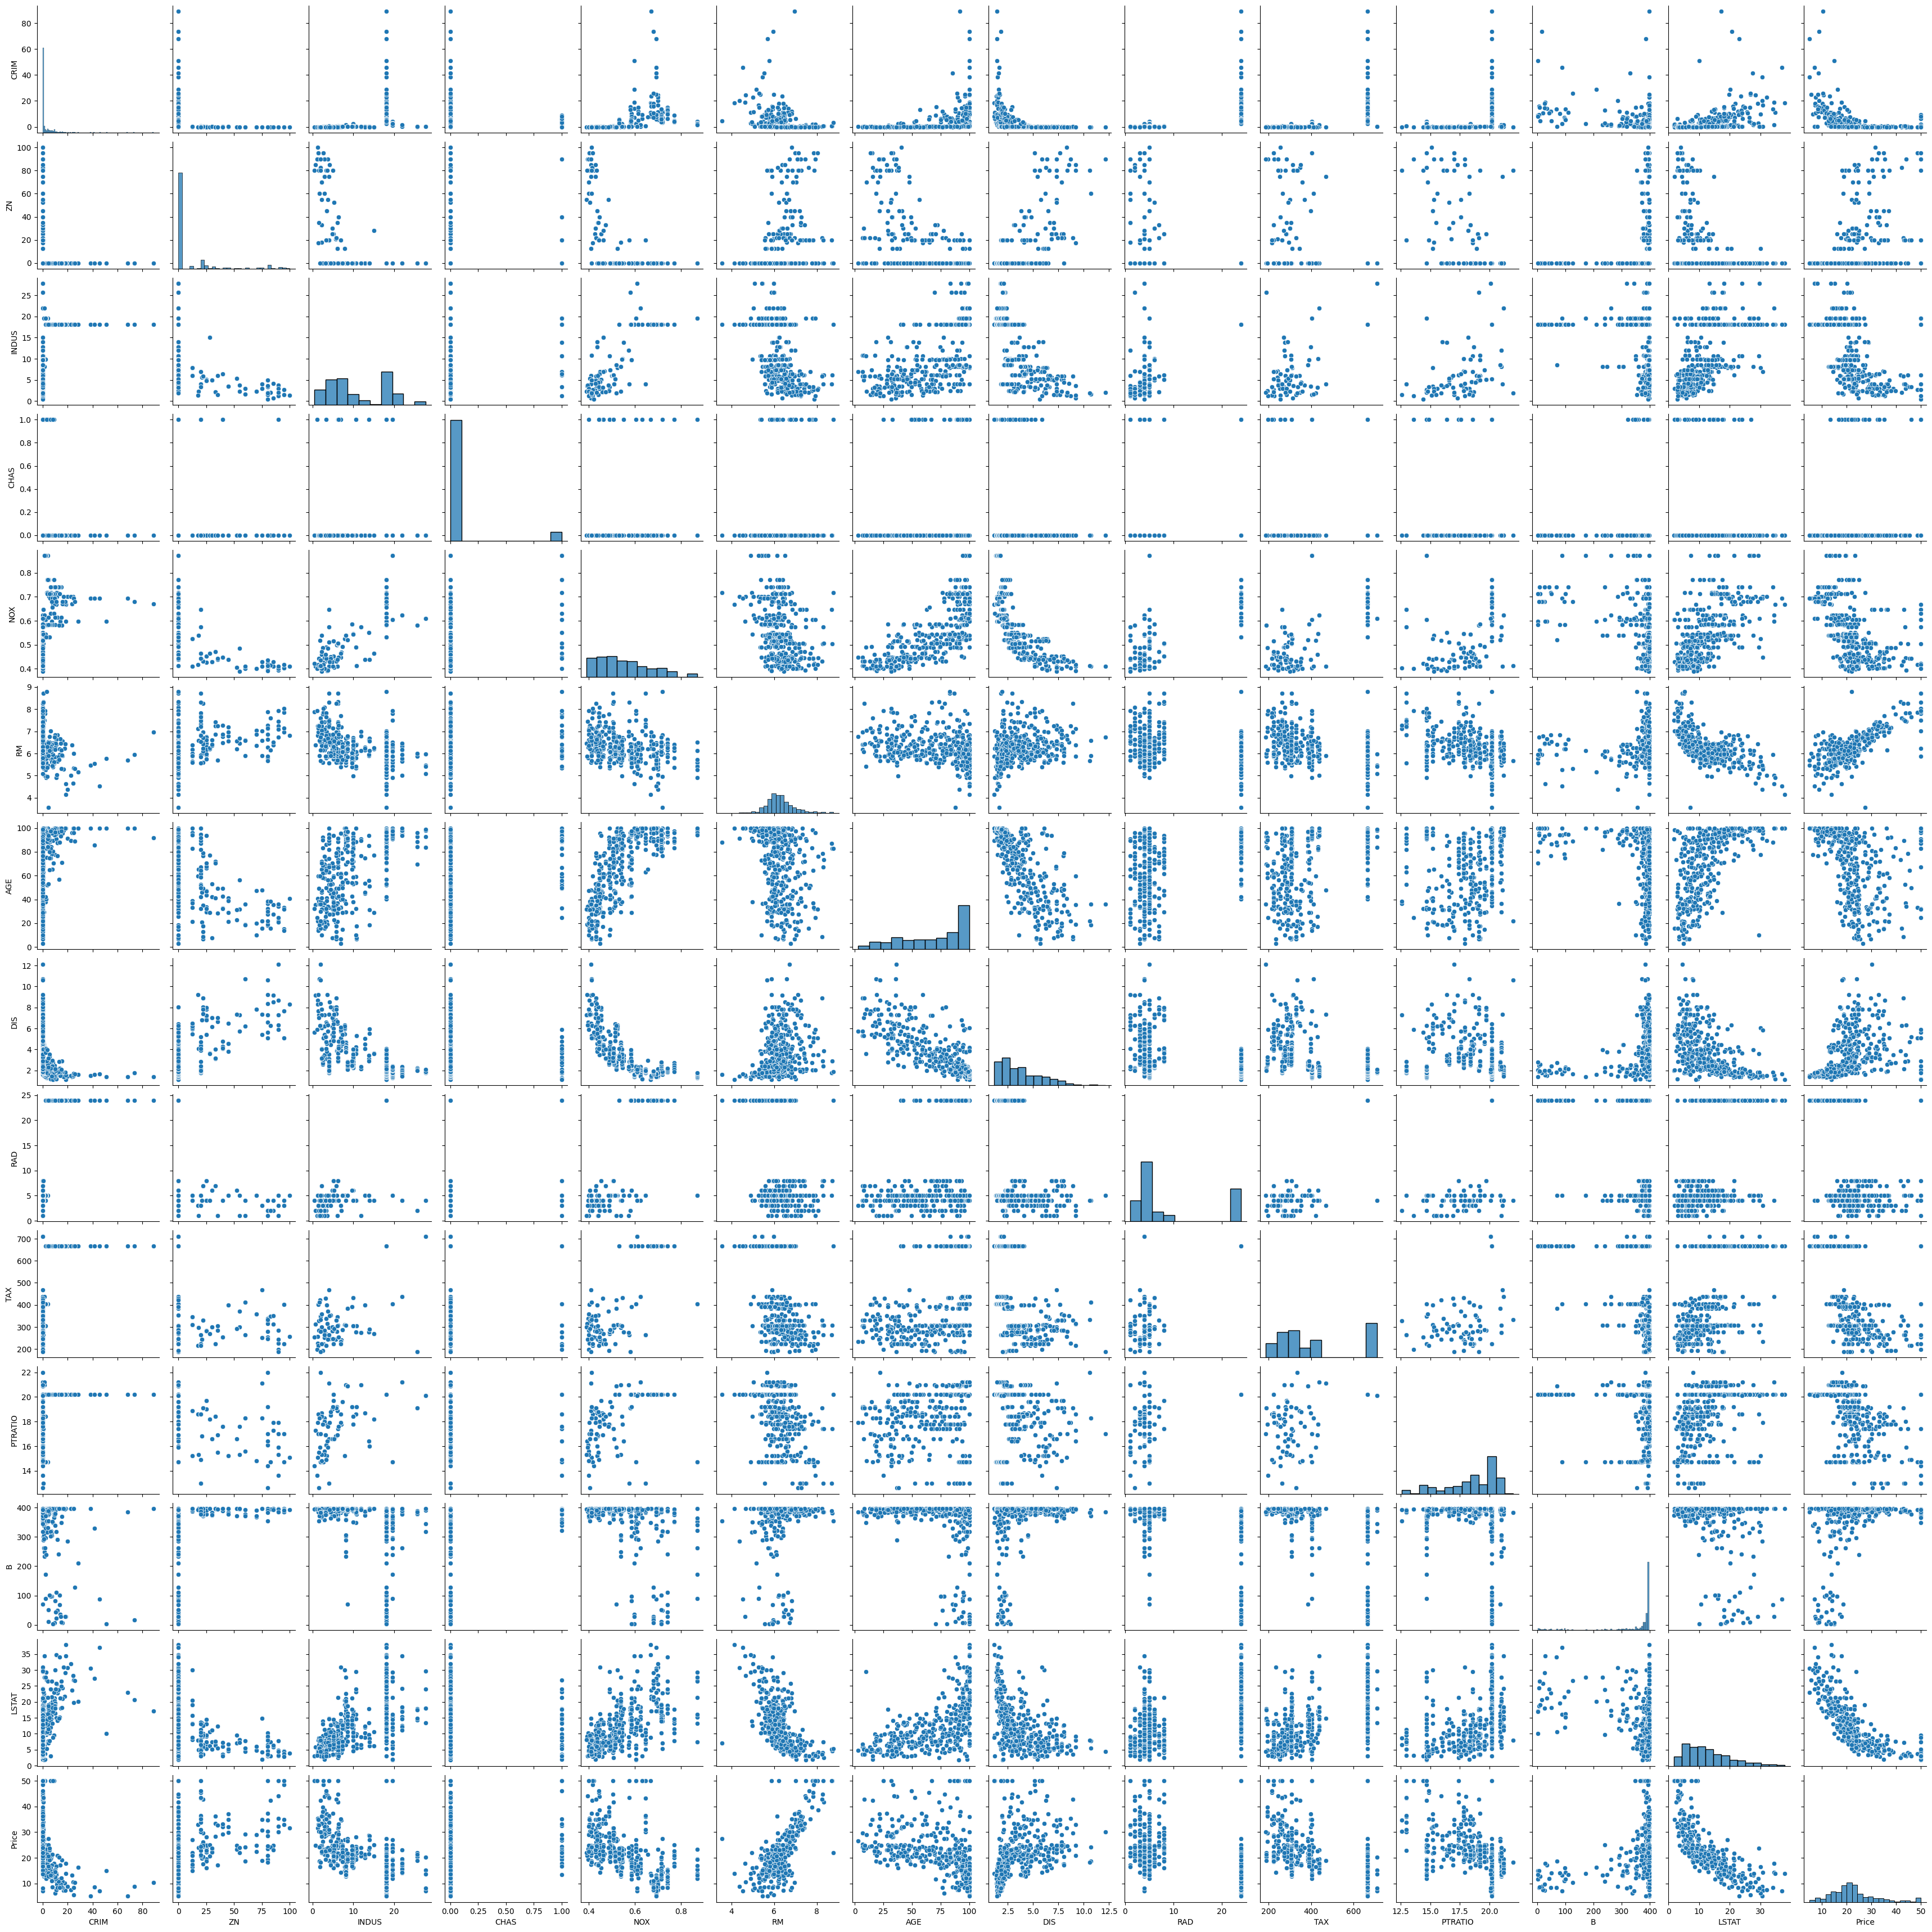

In [12]:
import seaborn as sns
sns.pairplot(df)

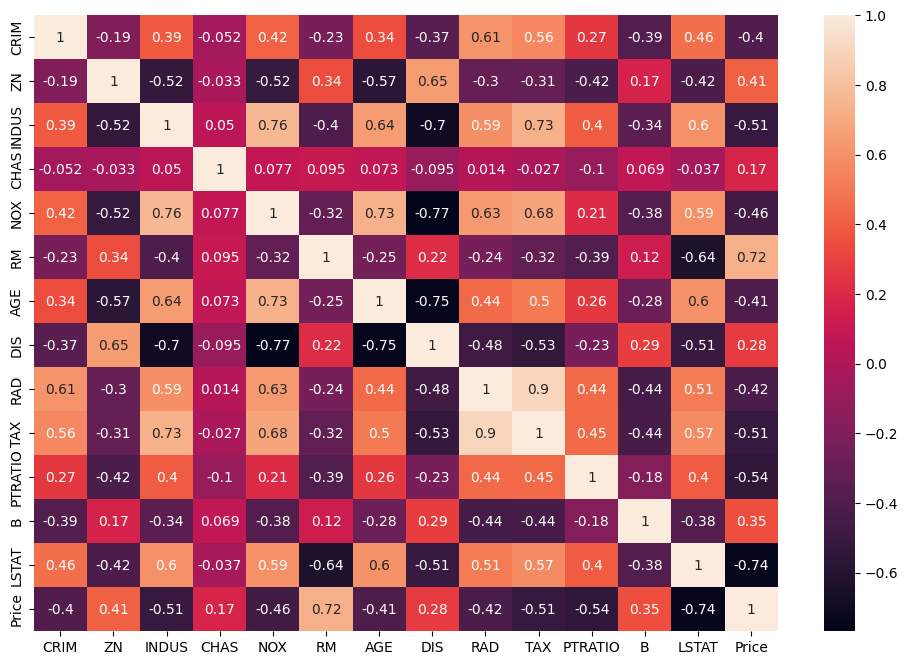

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

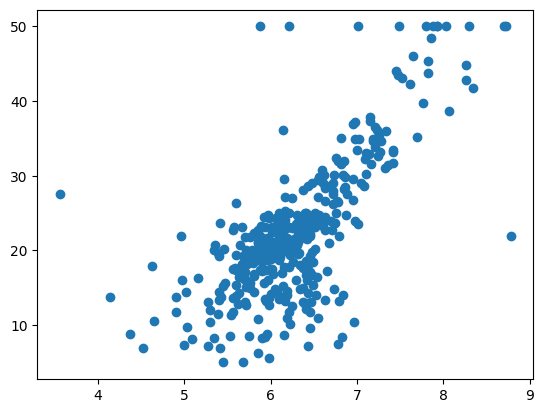

In [14]:
plt.scatter(x='RM', y='Price', data=df)

<Axes: xlabel='RM', ylabel='Price'>

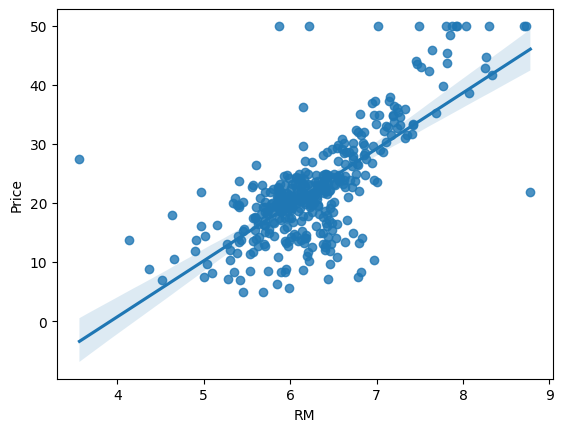

In [15]:
sns.regplot(x='RM', y='Price', data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

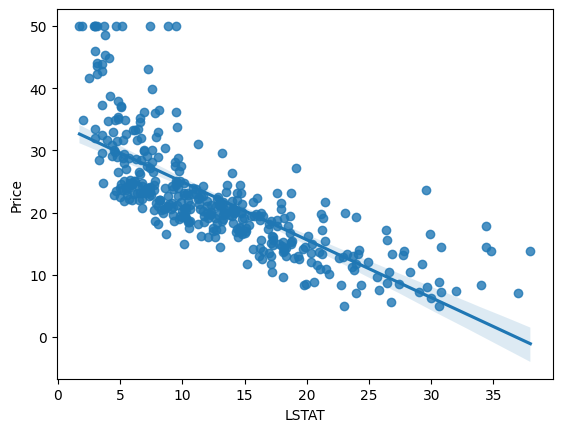

In [16]:
sns.regplot(x='LSTAT', y='Price', data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

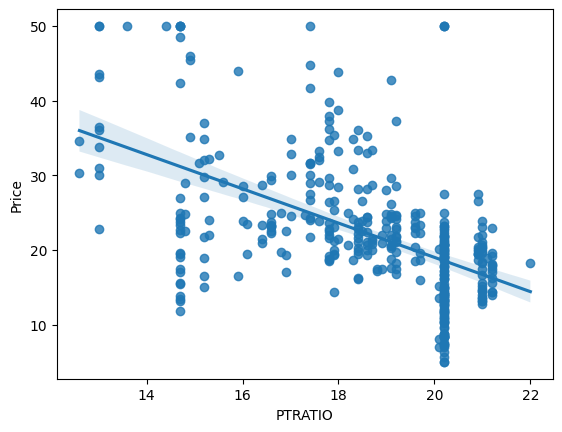

In [17]:
sns.regplot(x='PTRATIO', y='Price', data=df)

<Axes: xlabel='CHAS', ylabel='Price'>

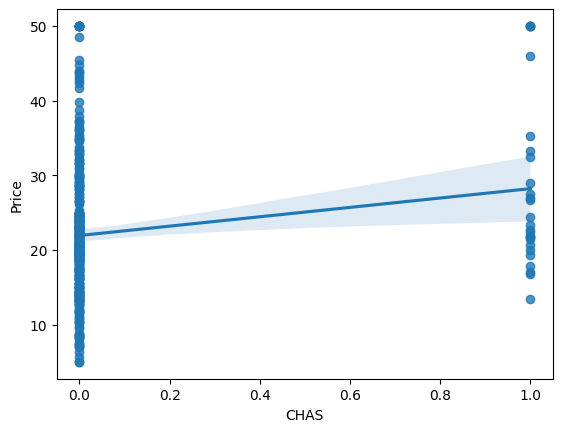

In [18]:
sns.regplot(x='CHAS', y='Price', data=df)

In [19]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: Price, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [23]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,377.68,5.10


### Standardize the Scale before modelling. 

In [24]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_model = Scaler.fit_transform(X_train)
X_train_model

array([[-0.3272605 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.40288864,  0.11593724],
       [ 0.04316861, -0.48865541,  1.04820426, ...,  0.75829743,
        -3.55599998,  0.81143377],
       [-0.3349325 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.35532602, -0.02235647],
       ...,
       [-0.40693189, -0.48865541, -0.97303729, ...,  0.1053238 ,
         0.3314929 , -0.32713969],
       [ 0.49545863, -0.48865541,  1.04820426, ...,  0.75829743,
         0.44817157,  0.69327992],
       [-0.40092822, -0.48865541,  2.16128768, ...,  0.24524672,
         0.25325809,  0.66642677]])

In [25]:
X_test_model = Scaler.transform(X_test)
X_test_model

array([[-0.40716288,  0.69773799,  0.59707376, ..., -0.17452204,
         0.4422651 , -0.90716768],
       [-0.40292265,  2.05361617, -1.37109361, ..., -0.12788107,
         0.4008162 , -0.69502782],
       [-0.36380757, -0.48865541, -0.16070753, ..., -0.0812401 ,
         0.44122888, -0.03175507],
       ...,
       [-0.39232937, -0.48865541, -0.53222677, ...,  0.47845159,
         0.44817157, -0.8185523 ],
       [-0.40115241,  1.41804828, -1.11309414, ..., -1.57375126,
         0.24900958, -1.05620265],
       [-0.29417529, -0.48865541,  1.60695739, ...,  1.22470717,
         0.44817157, -0.09485996]])

In [26]:
import pickle
pickle.dump(Scaler, open('scaling.pkl', 'wb'))

### Model Training

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LR = LinearRegression()
model = LR.fit(X_train_model, y_train)

In [29]:
# Print the coefficient (Slope) and the intercept
LR.coef_, LR.intercept_

(array([-1.16422484,  1.06108499,  0.39032387,  0.29209079, -1.99660097,
         2.919107  , -0.56678274, -2.98589329,  2.41887408, -2.87948075,
        -1.92242361,  0.87551786, -2.71551439]),
 21.872363636363634)

In [30]:
# On which paramter the model has been trained
LR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [31]:
# predict the training model
predict_test = model.predict(X_test_model)
predict_test

array([29.48758967, 16.89843072, 21.88395113, 30.03140416, 18.33998157,
       34.41717332, 22.29567579, 30.18541478, 32.68800811, 15.15148614,
       22.00937236, 40.89756783, 21.39760824, 16.631487  , 18.56021823,
       20.16135634, 17.03230083, 15.23458095, 22.21007405, 14.03864948,
       18.38308584, 20.31978106, 16.70540425, 29.04732153, 25.84896274,
       16.21750987, 26.91521769, 31.48625718, 23.80195772, 26.88649048,
       40.79205858, 17.93939578, 21.74000234, 17.0218407 , 17.45215081,
       20.87478891, 22.15708989, 21.38558618, 23.05850448, 21.06608939,
       27.72449001, 34.81400202, 21.78651421, 30.44288708, 34.59722541,
       19.75813031, 24.68728038, 10.22457273, 19.81849411, 25.15817576,
       21.82205121, 25.58520471, 14.76531893, 18.31754995, 18.17045495,
       23.96198129, 43.37418034, 22.39050206, 15.68056608, 23.22677962,
       20.98939499, 21.55059106, 14.59407927, 28.87042011, -3.45096729,
       32.51557282, 16.5500498 , 31.10947226, 24.8731608 , 20.17

### Assumptions

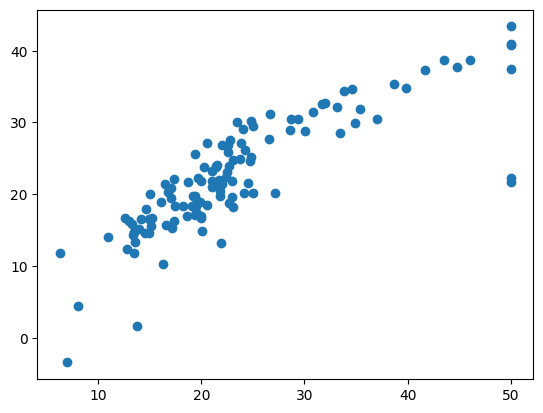

In [32]:
plt.scatter(y_test, predict_test)

In [33]:
# calculate residual error
residual = y_test-predict_test
residual

93    -4.487590
352    1.701569
319   -0.883951
65    -6.531404
499   -0.839982
         ...   
358    3.929978
457    1.646164
321   -1.638334
190    6.555052
131    0.491326
Name: Price, Length: 119, dtype: float64

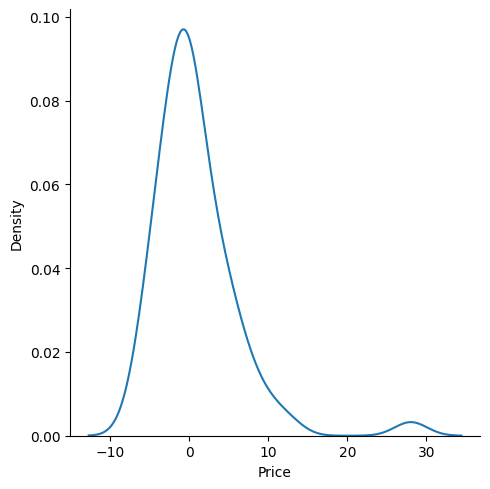

In [34]:
# plot the residuals to see distribution 
sns.displot(residual, kind='kde')

<Axes: ylabel='Price'>

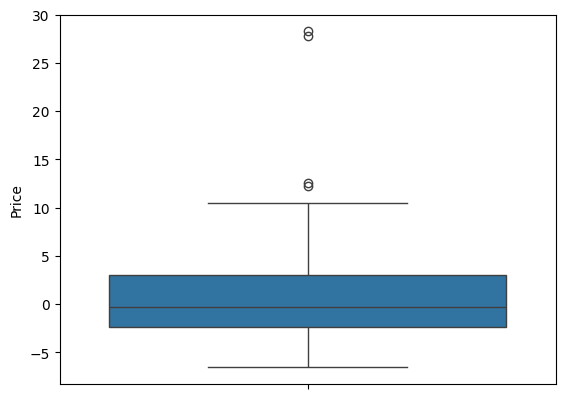

In [35]:
sns.boxplot(residual)

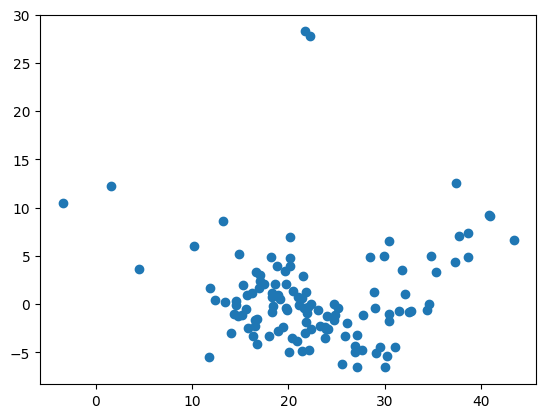

In [36]:
# trying to plot the scatter plot between residual and prediction
# uniform distribution
plt.scatter(predict_test, residual)

In [37]:
# verify the model performance
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(predict_test, y_test)
MSE

28.870771928253443

In [38]:

# verify the model performance
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,predict_test)
MAE

3.455821007247994

In [39]:
#Root mean square error
print(np.sqrt(mean_squared_error(predict_test, y_test)))

5.373152885248422


### R Square and Adjusted R Square

### R^2 = 1-SSR/SST (R^2= Coefficient of determination SSR = Sum of squares of residuals SST = Total sum of squares

In [40]:
from sklearn.metrics import r2_score
R_square = LR.score(X_test_model, y_test)
R_square

0.6905175764205996

In [41]:
score = r2_score(y_test,predict_test)
score

0.6905175764205996

### Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
Where R2 = The r2 of the model n: the number of observations k: the number of predicted variables

In [42]:
Adjusted_score = 1-(1-R_square)*(len(y_test)-1)/(len(y_test)-X_test_model.shape[1]-1)
Adjusted_score

0.6522007049298166

### New Data Prediction

In [43]:
new_data = df.iloc[0:1,:-1].to_numpy()

In [44]:
new_data.shape

(1, 13)

In [45]:
# Must transform the new data before predicting the price of Boston house price
Scaler_new = Scaler.transform(new_data)

c:\Users\nvenk\E2EMLProjects\Boston_house_price_prediction\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# new_data

In [46]:
model.predict(Scaler_new)

array([29.04732153])

### Pickling the model for Deployment

In [47]:
import pickle

In [48]:
pickle.dump(model, open('regmodel.pkl','wb'))

In [49]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [50]:
pickled_model.predict(Scaler_new)

array([29.04732153])